   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

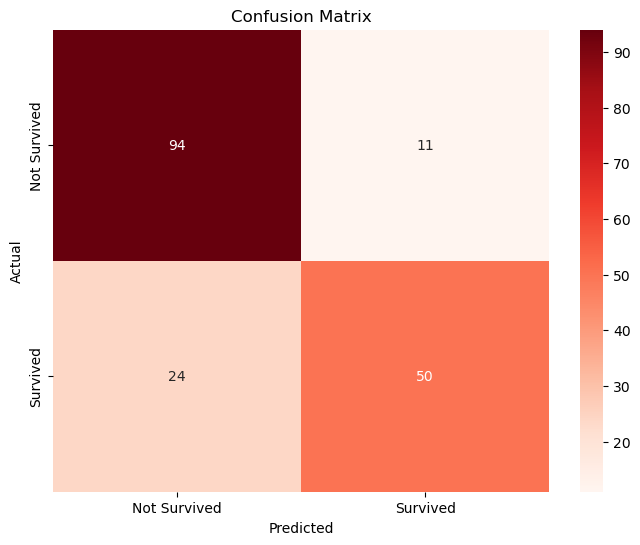

Survived


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Titanic-Dataset.csv')

print(data.head())
print(data.info())

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

encoder = OneHotEncoder(drop='first', sparse=False)
embarked_encoded = encoder.fit_transform(data[['Embarked']])
sex_encoded = pd.get_dummies(data['Sex'], drop_first=True)

encoded_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['Embarked']))
data = pd.concat([data.drop(['Sex', 'Embarked'], axis=1), sex_encoded, encoded_df], axis=1)

features = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Embarked_Q', 'Embarked_S']]
target = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Reds',
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

def forecast_survival(pclass, age, sibsp, parch, fare, sex, embarked):
    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],
        'male': [1 if sex.lower() == 'male' else 0],
        'Embarked_Q': [1 if embarked.lower() == 'q' else 0],
        'Embarked_S': [1 if embarked.lower() == 's' else 0],
    })

    result = classifier.predict(input_data)
    return 'Survived' if result[0] == 1 else 'Not Survived'

print(forecast_survival(pclass=1, age=22, sibsp=1, parch=0, fare=71.2833, sex='female', embarked='C'))
